# Identify Irises

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap
%matplotlib inline

from sklearn.datasets import load_iris
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn import metrics

## 1.Exploring data and preprocessing

In [2]:
# Load Iris dataset
iris = load_iris()
X = iris.data
y = iris.target

In [3]:
iris

{'data': array([[5.1, 3.5, 1.4, 0.2],
        [4.9, 3. , 1.4, 0.2],
        [4.7, 3.2, 1.3, 0.2],
        [4.6, 3.1, 1.5, 0.2],
        [5. , 3.6, 1.4, 0.2],
        [5.4, 3.9, 1.7, 0.4],
        [4.6, 3.4, 1.4, 0.3],
        [5. , 3.4, 1.5, 0.2],
        [4.4, 2.9, 1.4, 0.2],
        [4.9, 3.1, 1.5, 0.1],
        [5.4, 3.7, 1.5, 0.2],
        [4.8, 3.4, 1.6, 0.2],
        [4.8, 3. , 1.4, 0.1],
        [4.3, 3. , 1.1, 0.1],
        [5.8, 4. , 1.2, 0.2],
        [5.7, 4.4, 1.5, 0.4],
        [5.4, 3.9, 1.3, 0.4],
        [5.1, 3.5, 1.4, 0.3],
        [5.7, 3.8, 1.7, 0.3],
        [5.1, 3.8, 1.5, 0.3],
        [5.4, 3.4, 1.7, 0.2],
        [5.1, 3.7, 1.5, 0.4],
        [4.6, 3.6, 1. , 0.2],
        [5.1, 3.3, 1.7, 0.5],
        [4.8, 3.4, 1.9, 0.2],
        [5. , 3. , 1.6, 0.2],
        [5. , 3.4, 1.6, 0.4],
        [5.2, 3.5, 1.5, 0.2],
        [5.2, 3.4, 1.4, 0.2],
        [4.7, 3.2, 1.6, 0.2],
        [4.8, 3.1, 1.6, 0.2],
        [5.4, 3.4, 1.5, 0.4],
        [5.2, 4.1, 1.5, 0.1],
  

In [4]:
iris.feature_names

['sepal length (cm)',
 'sepal width (cm)',
 'petal length (cm)',
 'petal width (cm)']

In [5]:
iris.target_names

array(['setosa', 'versicolor', 'virginica'], dtype='<U10')

In [6]:
mapping = {i: class_name for i, class_name in enumerate(iris.target_names)}
print("Mapping:", mapping)

Mapping: {0: 'setosa', 1: 'versicolor', 2: 'virginica'}


In [7]:
iris.data.shape

(150, 4)

In [8]:
len(iris.target)

150

In [9]:
X[:5]

array([[5.1, 3.5, 1.4, 0.2],
       [4.9, 3. , 1.4, 0.2],
       [4.7, 3.2, 1.3, 0.2],
       [4.6, 3.1, 1.5, 0.2],
       [5. , 3.6, 1.4, 0.2]])

In [10]:
y[:5]

array([0, 0, 0, 0, 0])

In [11]:
unique_values, counts = np.unique(y, return_counts=True)

for value, count in zip(unique_values, counts):
    print(f"Value: {value}, Count: {count}")

Value: 0, Count: 50
Value: 1, Count: 50
Value: 2, Count: 50


In [12]:
# Apply PCA for visualization
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X)

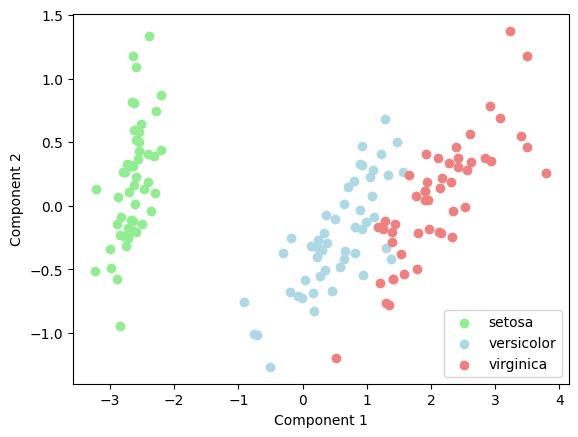

In [13]:
colors = ['lightgreen', 'lightblue', 'lightcoral']

for i, color in zip(range(3), colors):
    plt.scatter(X_pca[y == i, 0], X_pca[y == i, 1], c=color, label=iris.target_names[i])

plt.xlabel('Component 1')
plt.ylabel('Component 2')


plt.legend()
plt.show()

#### Some findings and processings about the data
1. Input variables contains 150 rows of data. Each has four numerical values as features. 

2. The output variable is 150 categorical values which has been encoded. 0 is 'setosa', 1 is 'versicolor', and 2 is 'virginica'.

3. There 50 observations for each category. Thus, the dataset is not biased.

4. In order to plot data, the dimensions of the dataset has been reduced.

5. According to the plot, setosa is far away from the other two categories. It has no overlaps with versicolor or virginica. Meanwhile, versicolor and virginica have some overlaps.

A proper model would be able to classify setosa 100% correct, while falsely classifying sevrals points in versicolor and virginica into each other's group.


## 2.Building and training model

In [14]:
# Train logistic regression model
model = LogisticRegression()
model.fit(X_pca, y)

LogisticRegression()

In [15]:
# Predictions
y_pred = model.predict(X_pca)
accuracy = metrics.accuracy_score(y, y_pred)
print("Accuracy:", accuracy, "\n")
print("Classifcation report:\n")
print(metrics.classification_report(y,y_pred)+"\n")
print("Confusion matrix:\n")
print(metrics.confusion_matrix(y,y_pred))

Accuracy: 0.9666666666666667 

Classifcation report:

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        50
           1       0.96      0.94      0.95        50
           2       0.94      0.96      0.95        50

    accuracy                           0.97       150
   macro avg       0.97      0.97      0.97       150
weighted avg       0.97      0.97      0.97       150


Confusion matrix:

[[50  0  0]
 [ 0 47  3]
 [ 0  2 48]]


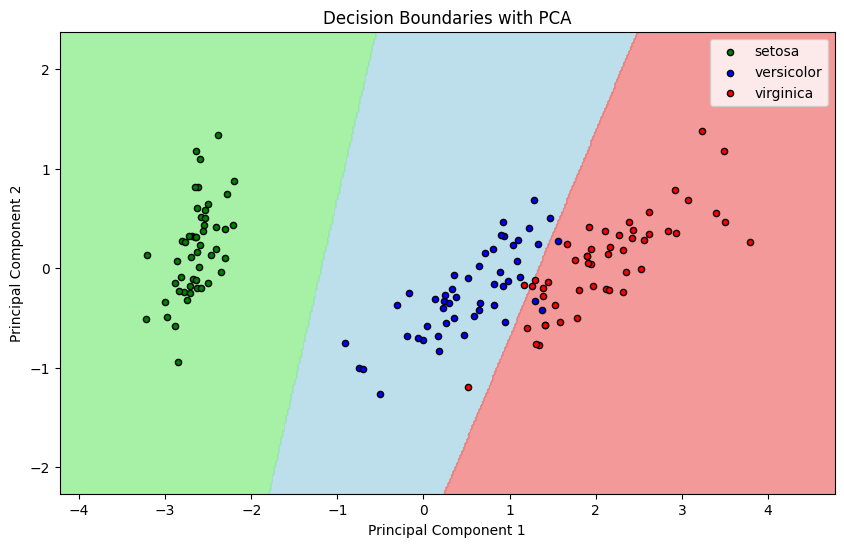

In [16]:
# Create a meshgrid to plot decision boundaries
h = .02  # step size in the mesh
x_min, x_max = X_pca[:, 0].min() - 1, X_pca[:, 0].max() + 1
y_min, y_max = X_pca[:, 1].min() - 1, X_pca[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))

# Plot decision boundaries
Z = model.predict(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)
plt.figure(figsize=(10, 6))
plt.contourf(xx, yy, Z, alpha=0.8, cmap=ListedColormap(('lightgreen', 'lightblue', 'lightcoral')))
# Plot each class separately to add legend
for i, color in enumerate(('green', 'blue', 'red')):
    plt.scatter(X_pca[y == i, 0], X_pca[y == i, 1], c=color, edgecolors='k', s=20, label=iris.target_names[i])

# Add legend
plt.legend(loc='best')
plt.title('Decision Boundaries with PCA')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.show()

#### Model Evaluation
1. The model has high accuracy. This is not suprising since the dataset is small and the model is trained and tested using the same dataset.
2. From f1-score and confusion matrix we can see setosa is 100% classified. 3 of versicolor and 2 of virginica are falsely classified. The results align with what we assumed the model would get from the scatter plot.

## 3.Regularization

Since our model is not complex, the dimension has been reduced to two, and the dataset is also very small, regulariztion is not expected to help improve performance and stability of the model.

In [32]:
# Regularization
model_2 = LogisticRegression(C=0.1,penalty="l2")
model_2.fit(X_pca, y)

LogisticRegression(C=0.1)

In [33]:
y_pred_2 = model_2.predict(X_pca)
accuracy = metrics.accuracy_score(y, y_pred_2)
print("Accuracy:", accuracy,"\n")
print("Classifcation report:\n")
print(metrics.classification_report(y,y_pred_2),"\n")
print("Confusion matrix:\n")
print(metrics.confusion_matrix(y,y_pred_2))

Accuracy: 0.9333333333333333 

Classifcation report:

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        50
           1       0.92      0.88      0.90        50
           2       0.88      0.92      0.90        50

    accuracy                           0.93       150
   macro avg       0.93      0.93      0.93       150
weighted avg       0.93      0.93      0.93       150
 

Confusion matrix:

[[50  0  0]
 [ 0 44  6]
 [ 0  4 46]]


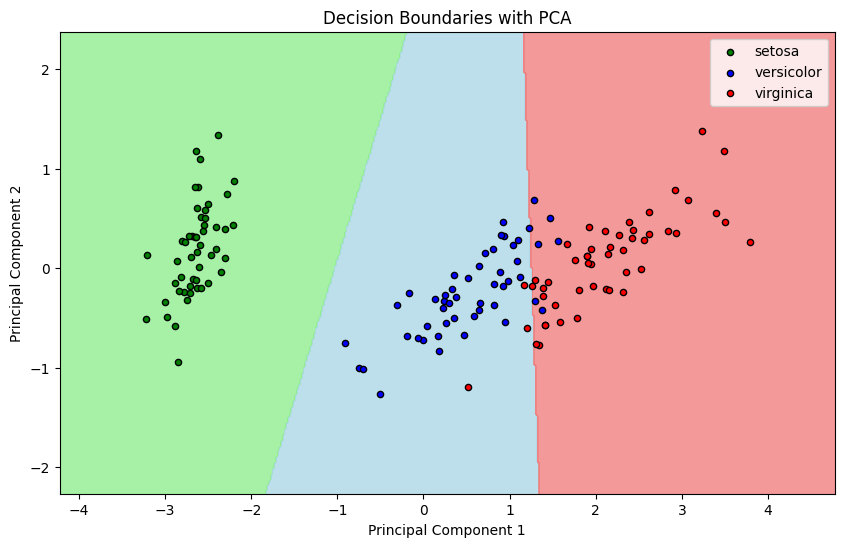

In [34]:
# Create a meshgrid to plot decision boundaries
h = .02  # step size in the mesh
x_min, x_max = X_pca[:, 0].min() - 1, X_pca[:, 0].max() + 1
y_min, y_max = X_pca[:, 1].min() - 1, X_pca[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))

# Plot decision boundaries
Z = model_2.predict(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)
plt.figure(figsize=(10, 6))
plt.contourf(xx, yy, Z, alpha=0.8, cmap=ListedColormap(('lightgreen', 'lightblue', 'lightcoral')))
# Plot each class separately to add legend
for i, color in enumerate(('green', 'blue', 'red')):
    plt.scatter(X_pca[y == i, 0], X_pca[y == i, 1], c=color, edgecolors='k', s=20, label=iris.target_names[i])

# Add legend
plt.legend(loc='best')
plt.title('Decision Boundaries with PCA')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.show()

#### Reviews of regularization
With a small C = 0.1 I assumed the original model is overfitting,

## 4.Select model